# 一、装载数据

我们的数据需要是numpy的数组，或者scipy的矩阵，其他类型的数据需要转换为数组的形式，像pandas的dataframe也是可以的

（1）监督学习估计器

    （一）标准化（Z-Score）  
    公式：(X-mean)/std   
    效果：对于每个属性/每列来说所有数据都聚集在0附近，方差为1
    使用目的：数据标准化主要功能就是消除变量间的量纲关系，从而使数据具有可比性
    
    （二）归一化（缩放）
    公式：X_scaled=X_std/(max-min)+min
    效果：将属性缩放到一个指定的最大和最小值（通常是0-1）之间
    使用目的：
    1、对于方差非常小的属性可以增强其稳定性。
    2、维持稀疏矩阵中为0的条目。
    3、加快训练速度。基本上所有的机器学习算法进行训练前都要进行归一化，除非你确定所有特征的范围一致，这样可以加快收敛速度。
    4、计算样本之间的距离时，降低特征的值域范围广带来的影响，从而提高距离计算的精度。
    
    （三）正则化（Normalization）
    公式：||X||p=(|x1|^p+|x2|^p+...+|xn|^p)^1/p
    效果：使得每个处理后样本的p-范数（l1-norm,l2-norm）等于1，将每个样本缩放到单位范数（每个样本的范数为1）
    使用目的：主要应用于文本分类和聚类中，对于两个TF-IDF向量的l2-norm进行点积，就可以得到这两个向量的余弦相似性
            后面要使用如二次型（点积）或者其它核方法计算两个样本之间的相似性这个方法会很有用。
            
    （四）非线性映射
    公式：该方法包括 log、指数，正切等
    效果：通过一些数学函数，将原始值进行映射
    使用目的：经常用在数据分化比较大的场景，有些数值很大，有些很小

数据的预处理

可以参考这篇文章 (http://www.afenxi.com/post/41476)

或者http://shujuren.org/article/234.html

In [127]:
#标准化（standardization）
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
standardized_X=scaler.transform(X_train)
standardized_X_test=scaler.transform(X_test)

In [128]:
#正则化（Normalization）
from sklearn.preprocessing import  Normalizer
scaler=Normalizer().fit(X_train)
normalized_X=scaler.transform(X_train)
normalized_X_test=scaler.transform(X_test)

In [130]:
#二值化binarization，阈值0.0，大于阈值标记为1
from sklearn.preprocessing import  Binarizer
binarizer=Binarizer(threshold=0.0).fit(X)
binary_X=binarizer.transform(X)

In [132]:
#分类变量编码
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
y=enc.fit_transform(y)

In [135]:
#处理缺失数据
from sklearn.preprocessing import  Imputer
imp=Imputer(missing_values=0,strategy='mean',axis=0)
imp.fit_transform(X_train)

array([[ 0.77716576,  0.10949287,  0.16557672,  0.37717926,  0.52075047],
       [ 0.9768474 ,  0.58841396,  0.90106901,  0.6311938 ,  0.19264754],
       [ 0.83669815,  0.62460285,  0.13855808,  0.87548089,  0.90208272],
       [ 0.56700936,  0.46604143,  0.87966502,  0.0416925 ,  0.40855075],
       [ 0.0747161 ,  0.41481283,  0.07586417,  0.9470342 ,  0.46299087],
       [ 0.03546804,  0.6456994 ,  0.52128713,  0.93130834,  0.53349103],
       [ 0.81027312,  0.93091396,  0.89134421,  0.7460123 ,  0.11728856]])

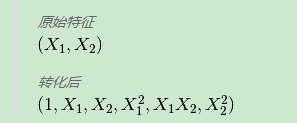

In [137]:
#产生多项式特征,如图
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(5)
poly.fit_transform

<bound method PolynomialFeatures.fit_transform of PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)>

In [26]:
import numpy as np
X=np.random.random((10,5))
y=np.array(['M','M','F','F','M','F','M','M','F','F'])
print X
print y

[[ 0.03546804  0.6456994   0.52128713  0.93130834  0.53349103]
 [ 0.9768474   0.58841396  0.90106901  0.6311938   0.19264754]
 [ 0.06439212  0.82471942  0.68979943  0.53010229  0.03980094]
 [ 0.0747161   0.41481283  0.07586417  0.9470342   0.46299087]
 [ 0.20009369  0.84862829  0.18303969  0.47662696  0.86897306]
 [ 0.81027312  0.93091396  0.89134421  0.7460123   0.11728856]
 [ 0.83669815  0.62460285  0.13855808  0.87548089  0.90208272]
 [ 0.56700936  0.46604143  0.87966502  0.0416925   0.40855075]
 [ 0.93908243  0.52229472  0.0566155   0.79555997  0.93342816]
 [ 0.77716576  0.10949287  0.16557672  0.37717926  0.52075047]]
['M' 'M' 'F' 'F' 'M' 'F' 'M' 'M' 'F' 'F']


In [27]:
from sklearn.cross_validation import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [123]:
y_train

array(['F', 'M', 'M', 'M', 'F', 'M', 'F'], 
      dtype='|S1')

In [28]:
#(1)线性回归linearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)

help(LinearRegression)  #也可以是help(lr) 

In [29]:
#(2)支持向量机svm
from sklearn.svm import SVC
svc=SVC(kernel='linear')  #核函数为线性的？

help(SVC)

In [30]:
#(3)朴素贝耶斯
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

help(GaussianNB)

In [31]:
#(3)K最近邻knn
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=5)

help(knn)

（2）非监督学习估计器

In [32]:
#(1)主成分分析
from sklearn.decomposition  import PCA
pca=PCA(n_components=0.95)#保留的数量

help(PCA)

In [33]:
#(2)k-mean
from  sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3,random_state=0)

help(KMeans)

# 四、训练模型

In [120]:
#(1)监督学习训练过程
lr.fit(list(df[u'特征']),list(df[u'类别']))
# 需要先将y转变为数值型
import pandas as pd
df=zip(X,y) 
df=pd.DataFrame(df,columns={u'特征',u'类别'})
y_mapping = {"M": 1, "F":0 }
df[u'类别']=df[u'类别'].map(y_mapping)

#
knn.fit(X_train,y_train)
#
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
#（2）非监督学习的训练过程
k_means.fit(X_test)
pca_model=pca.fit_transform(X_train)

# 五、预测

In [ ]:
#（1）监督学习的预测过程
y_pred=svc.predict(np.random.random((2,5)))
y_pred=lr.predict(X_test)
y_pred=knn.predict_proba(X_test)

In [126]:
#(2)非监督学习的预测过程
y_pred=k_means.predict(X_test)

# 六、模型评价